<a href="https://colab.research.google.com/github/Yeshwanth2003/mlLab/blob/main/SVMmllab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo seaborn

In [2]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from pprint import pprint

data_set = fetch_ucirepo(id=294)
target = data_set.data.targets.values.flatten()
data = data_set.data.features

x_train,x_temp,y_train,y_temp = train_test_split(data,target,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5)

<Axes: >

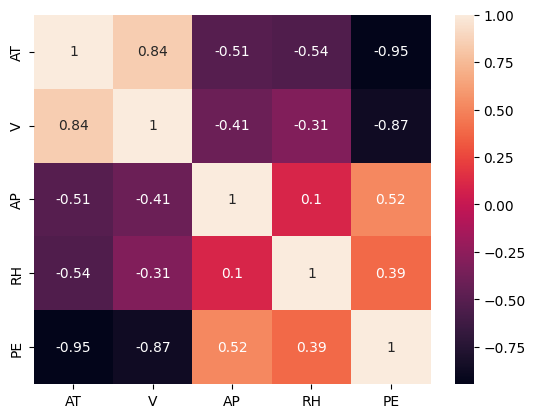

In [3]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

df = pd.DataFrame(data_set.data.original)
sns.heatmap(df.corr(),annot=True)

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0]}
svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'epsilon': 0.001}
Best score:  0.9303474599108675


Mean Squared Error: 22.705603146712406
R2_Score: 0.9243760246617585


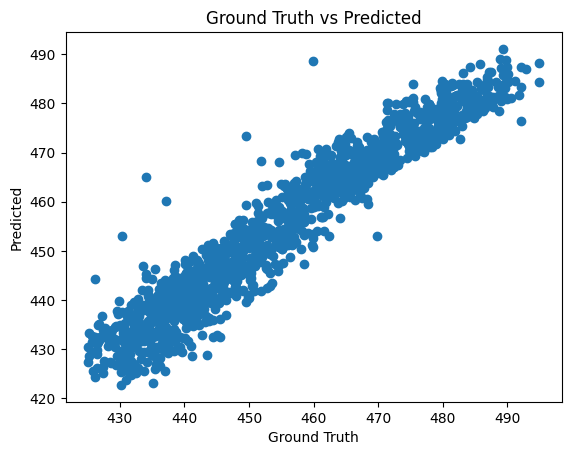

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred = grid_search.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:",mse)
print("R2_Score:",r2)

plt.scatter(y_val,y_pred)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.title('Ground Truth vs Predicted')
plt.show()

In [6]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0],'gamma':[0.001, 0.01, 0.1, 1, 10]}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 100, 'epsilon': 1.0, 'gamma': 1}
Best score:  0.9504266973897068


Mean Squared Error: 16.365540809894565
R2_Score: 0.9454924299254456


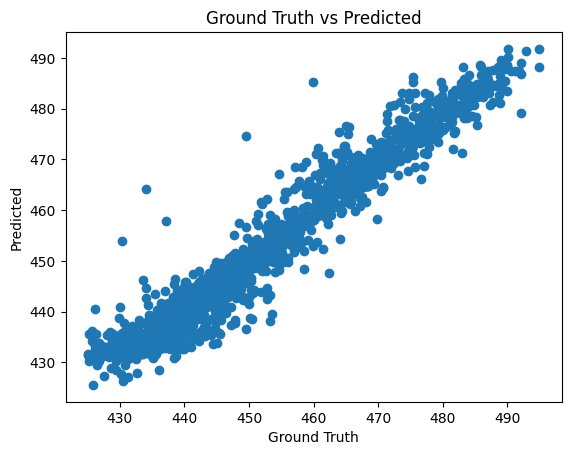

In [7]:
y_pred = grid_search.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:",mse)
print("R2_Score:",r2)

plt.scatter(y_val,y_pred)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.title('Ground Truth vs Predicted')
plt.show()